<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [17]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_300/2976634988.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')


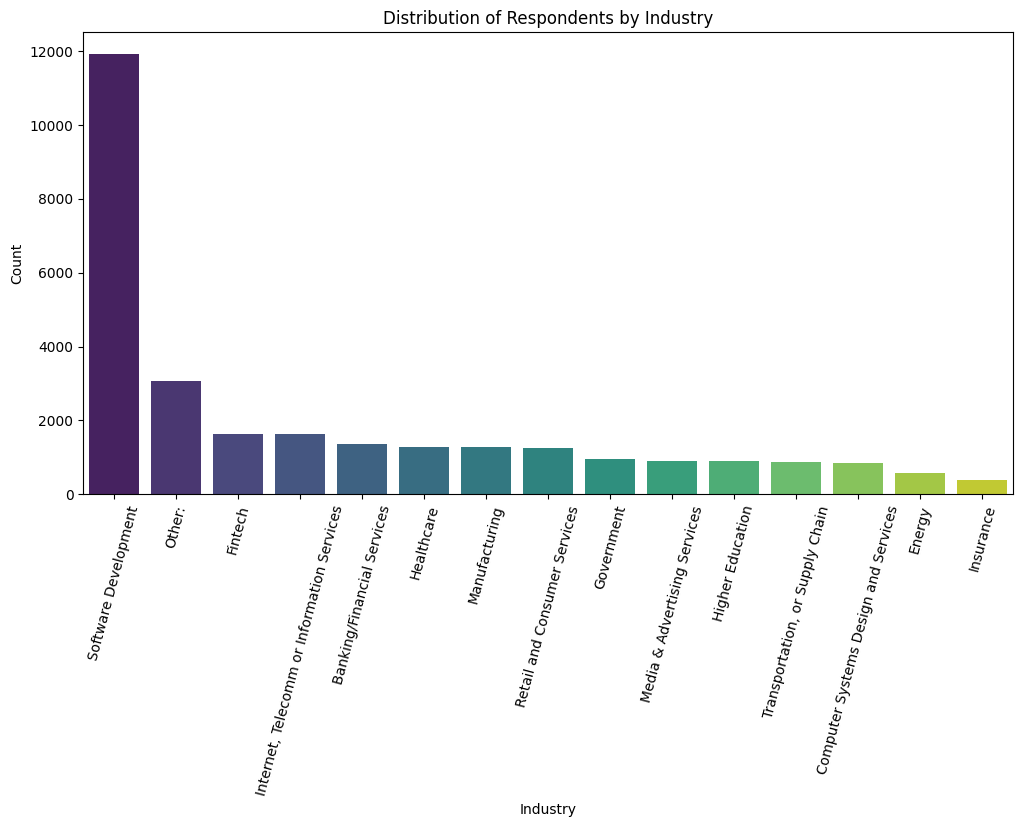

In [3]:
if 'Industry' in df.columns:
    industry_counts = df['Industry'].value_counts()
    
    # Plot a bar chart for industry distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')
    plt.title("Distribution of Respondents by Industry")
    plt.xlabel("Industry")
    plt.ylabel("Count")
    plt.xticks(rotation=75)
    plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
if 'ConvertedCompYearly' in df.columns:
    comp_mean = df['ConvertedCompYearly'].mean()
    comp_median = df['ConvertedCompYearly'].median()
    comp_std = df['ConvertedCompYearly'].std()
    
    threshold = comp_mean + 3 * comp_std
    high_earners = df[df['ConvertedCompYearly'] > threshold]
    
    print(f"\nCompensation Statistics:")
    print(f"Mean: {comp_mean:.2f}, Median: {comp_median:.2f}, Standard Deviation: {comp_std:.2f}")
    print(f"Threshold for High Earners: {threshold:.2f}")
    print(f"Number of High Earners: {len(high_earners)}")


Compensation Statistics:
Mean: 86155.29, Median: 65000.00, Standard Deviation: 186756.97
Threshold for High Earners: 646426.21
Number of High Earners: 89


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.



Number of Outliers in Yearly Compensation: 978

Top Outliers:
                                   Industry  ConvertedCompYearly
15837                                   NaN           16256603.0
12723          Media & Advertising Services           13818022.0
28379  Computer Systems Design and Services            9000000.0
17593                  Software Development            6340564.0
17672                  Software Development            4936778.0


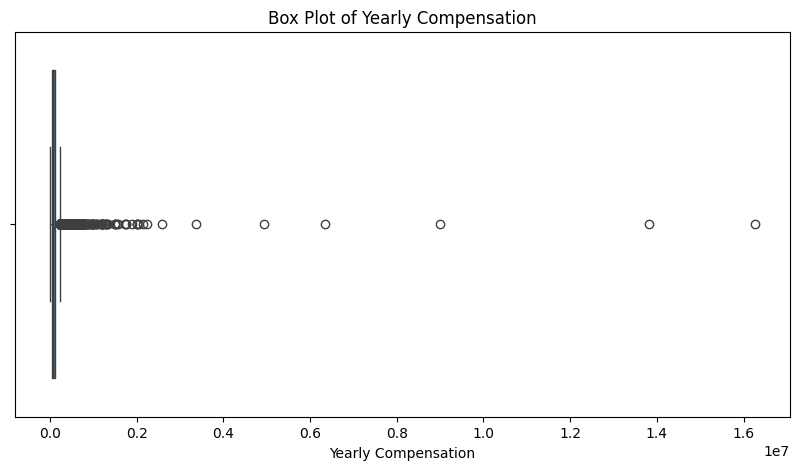

In [5]:
if 'ConvertedCompYearly' in df.columns:
    # Calculate IQR
    q1 = df['ConvertedCompYearly'].quantile(0.25)
    q3 = df['ConvertedCompYearly'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
    
    # Count and visualize outliers
    print(f"\nNumber of Outliers in Yearly Compensation: {len(outliers)}")
    if not outliers.empty:
        print("\nTop Outliers:")
        print(outliers[['Industry', 'ConvertedCompYearly']].sort_values(by='ConvertedCompYearly', ascending=False).head())
    
    # Plot box plot for visualization
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df['ConvertedCompYearly'])
    plt.title("Box Plot of Yearly Compensation")
    plt.xlabel("Yearly Compensation")
    plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [13]:
if 'ConvertedCompYearly' in df.columns:
    df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)].copy()
    
    print(f"\nOriginal DataFrame Size: {df.shape[0]} rows")
    print(f"Cleaned DataFrame Size: {df_clean.shape[0]} rows")


Original DataFrame Size: 65437 rows
Cleaned DataFrame Size: 22457 rows


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


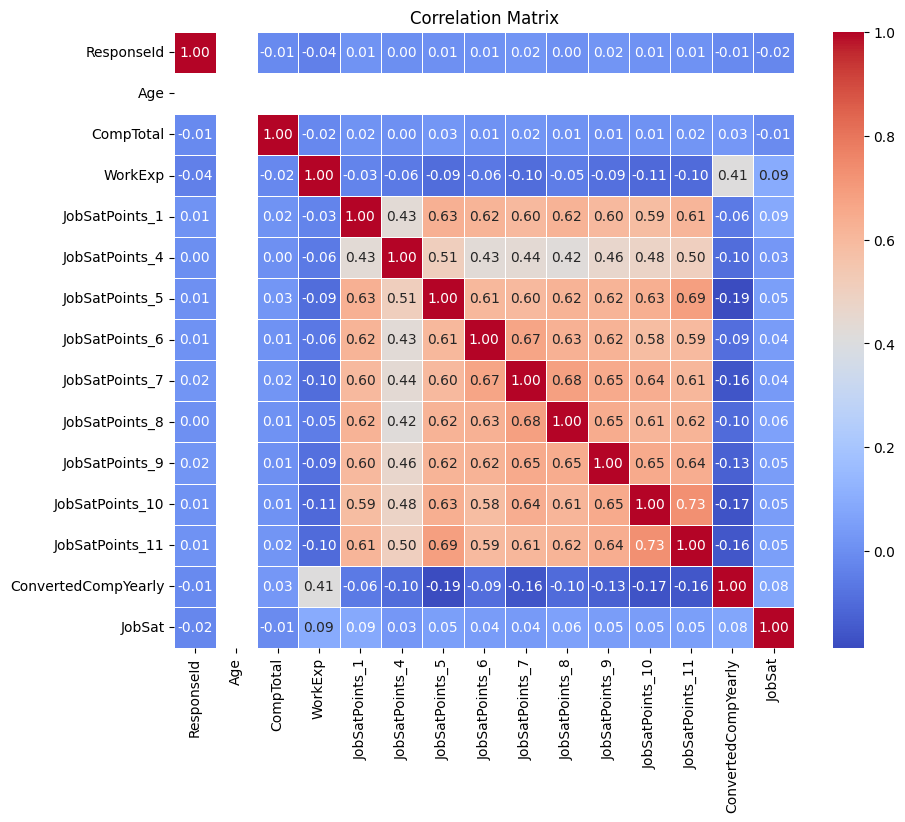

In [20]:
import numpy as np  # Ensure NumPy is available

# Step 6: Correlation Analysis
if 'Age' in df_clean.columns:
    # Compute correlations
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    correlation_matrix = df_clean[numeric_cols].corr()

    # Visualize correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
